# SIR Model



Import simulator, integration methods and kernel

In [1]:
# only needed for jupyter notebook
import os
import sys 
cwd = os.getcwd()
sys.path.append(f"{os.getcwd()}\\src")

# import matplotlib
import matplotlib.pyplot as plt

# import simulation packages
from simulate import Simulator
from simulate.integrators import integration_methods
from simulate.kernels import SIRKernel

### Initialize the kernel

Choose a fitting integration method.

In [2]:
kernel = SIRKernel(
    alpha=0.5,
    beta=0.1,
    population=1000,
    integrator=integration_methods.euler,
)

### Initialize the simulator

Choose step size and the maximum number of steps

In [3]:
sim = Simulator(kernel, step_size=0.01, max_steps=100)

### Run the simulation
Run and read the progress recordings

In [4]:
sim.run()
result = sim.progress()

### Extract results

Extract the result vectors using the labels

In [5]:
labels = kernel.labels()

steps = result[:, labels["step"]]
susceptible = result[:, labels["susceptible"]]
infected = result[:, labels["infected"]]
removed = result[:, labels["removed"]]

### Plot the results

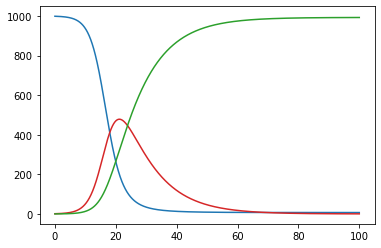

In [6]:
fig = plt.figure()
axis = fig.add_subplot()
axis.plot(steps, susceptible, color="tab:blue")
axis.plot(steps, infected, color="tab:red")
axis.plot(steps, removed, color="tab:green")

plt.show()